In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import skew
%matplotlib inline
rcParams['figure.figsize'] = (12.0, 6.0)

df_train = pd.read_csv( "train.csv" )
df_test = pd.read_csv( "test.csv" )

In [2]:
print(f"train shape : {df_train.shape}")
print(f" test shape : {df_test.shape}")

train shape : (1460, 81)
 test shape : (1459, 80)


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# 描述data數值型態的統計資訊（個數、平均、標準差、最小值、
#                           第一四分位數、第二四分位數、第三四分位數
#                           、最大值）
print(f"numerical feature: {df_train.describe().shape}")
df_train.describe()

numerical feature: (8, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# 描述data物件型態的統計資訊（個數、種類、出現頻率最高的種類及其次數）
print(f"categorical features: {df_train.describe(include='O').shape}")
df_train.describe(include="O")


categorical features: (4, 43)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [6]:
# df_train.describe(include="O").iloc[0,:]

In [7]:
# #dump too many NAs
# df_train = df_train.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1)
# df_test = df_test.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1)

## EDA (Drop Outlier)

In [8]:
df_train.shape

(1460, 81)

523     184750
691     755000
1182    745000
1298    160000
Name: SalePrice, dtype: int64


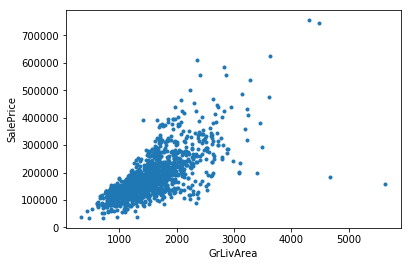

In [9]:
# It helps to drop outliers for relevant features
plt.plot(df_train.GrLivArea, df_train.SalePrice, '.' )
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
print( df_train[ df_train.GrLivArea > 4000 ].SalePrice )

496     430000
523     184750
1298    160000
Name: SalePrice, dtype: int64


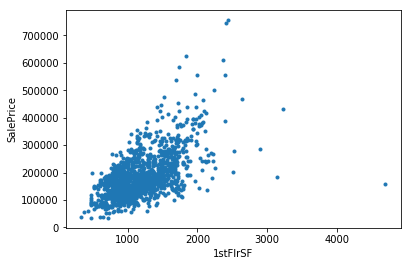

In [10]:
# 1stFlrSF seems relevant
plt.plot(df_train['1stFlrSF'], df_train['SalePrice'], '.')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
print( df_train[ df_train['1stFlrSF'] > 3000 ].SalePrice )

In [11]:
# drop掉離群值
df_train = df_train.drop( labels = df_train[ df_train.GrLivArea > 4500 ].index, axis = 0 )
print( df_train[ df_train.GrLivArea > 4000 ].SalePrice )

691     755000
1182    745000
Name: SalePrice, dtype: int64


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


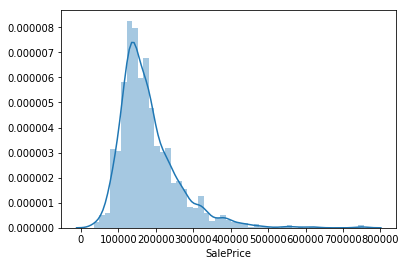

In [12]:
sns.distplot(df_train.SalePrice)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


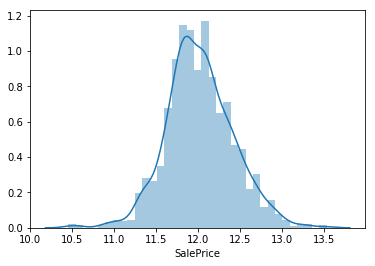

In [13]:
# 一些右偏分佈的 feature，可透過取 log 將其轉為常態分佈
sns.distplot(np.log(df_train.SalePrice))

In [14]:
#取得數值型態的欄位
numeric_data = df_train._get_numeric_data()
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## sketch pics


there are 0 NaN in Id


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


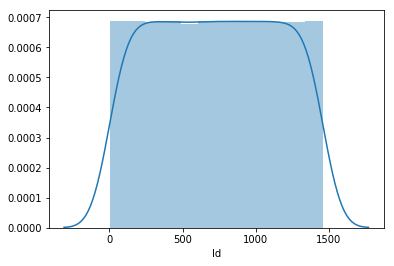

there are 0 NaN in MSSubClass


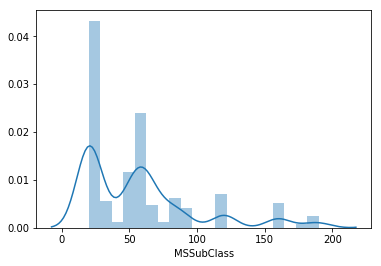

there are 259 NaN in LotFrontage


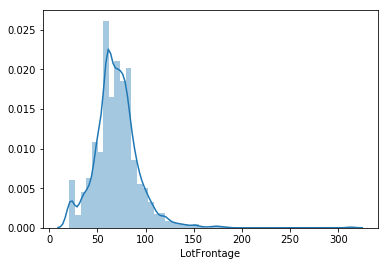

there are 0 NaN in LotArea


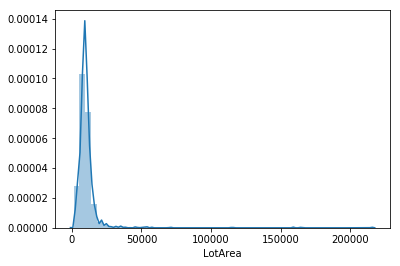

there are 0 NaN in OverallQual


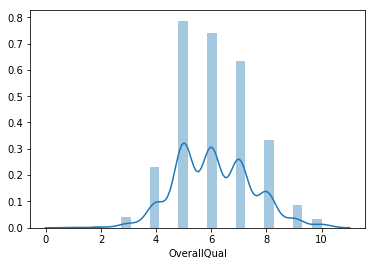

there are 0 NaN in OverallCond


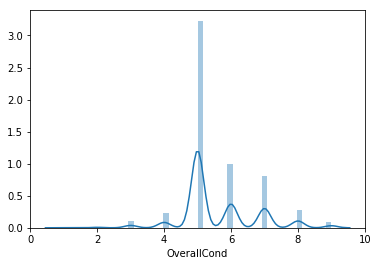

there are 0 NaN in YearBuilt


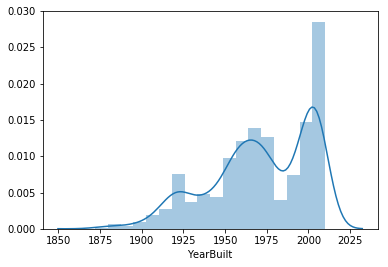

there are 0 NaN in YearRemodAdd


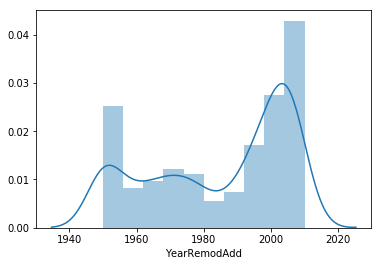

there are 8 NaN in MasVnrArea


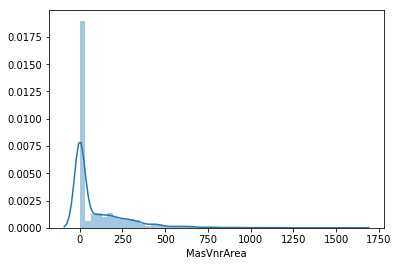

there are 0 NaN in BsmtFinSF1


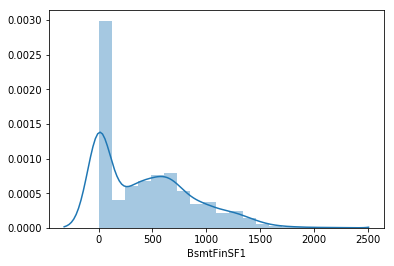

there are 0 NaN in BsmtFinSF2


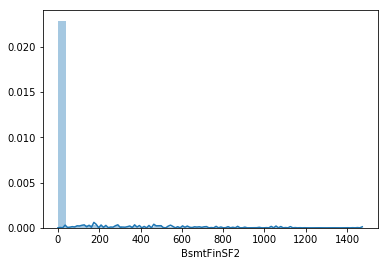

there are 0 NaN in BsmtUnfSF


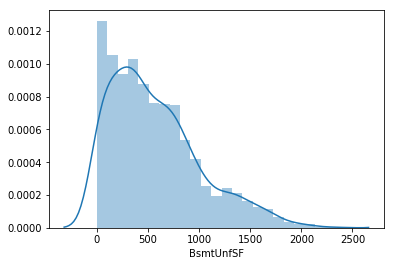

there are 0 NaN in TotalBsmtSF


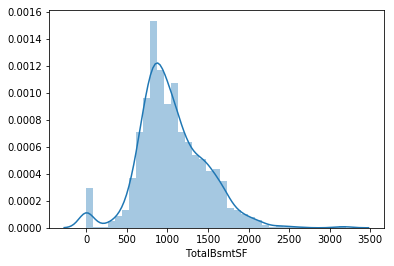

there are 0 NaN in 1stFlrSF


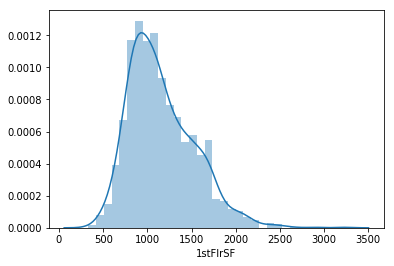

there are 0 NaN in 2ndFlrSF


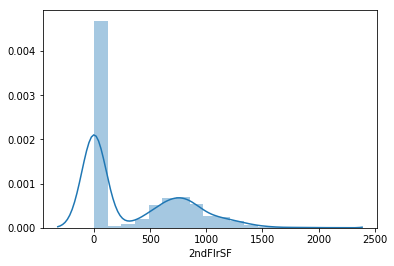

there are 0 NaN in LowQualFinSF


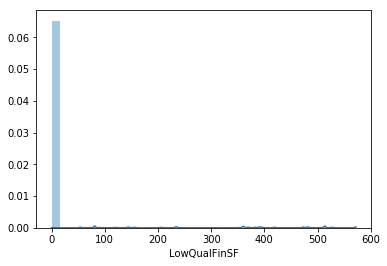

there are 0 NaN in GrLivArea


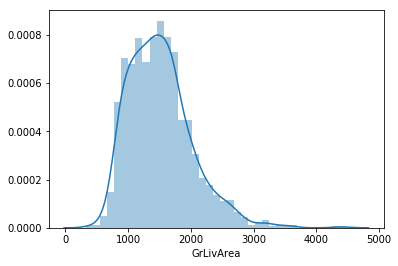

there are 0 NaN in BsmtFullBath


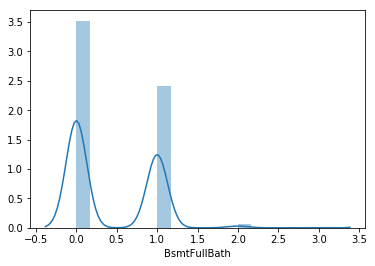

there are 0 NaN in BsmtHalfBath


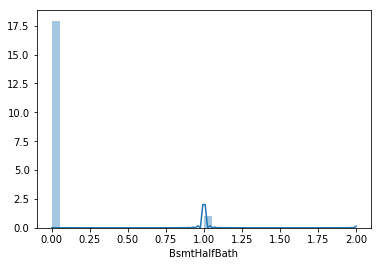

there are 0 NaN in FullBath


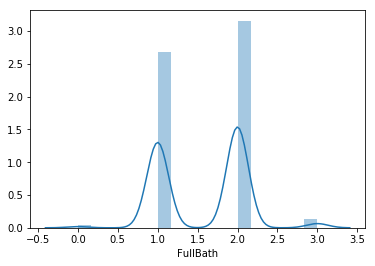

there are 0 NaN in HalfBath


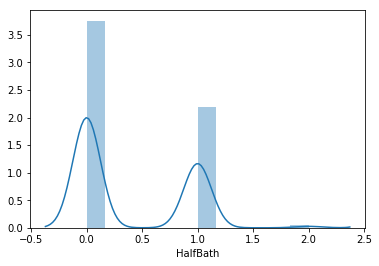

there are 0 NaN in BedroomAbvGr


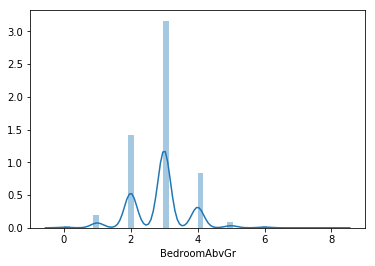

there are 0 NaN in KitchenAbvGr


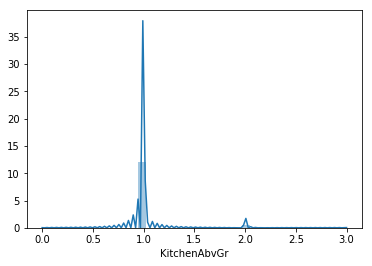

there are 0 NaN in TotRmsAbvGrd


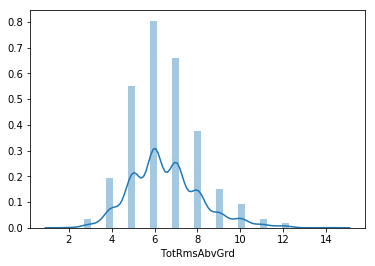

there are 0 NaN in Fireplaces


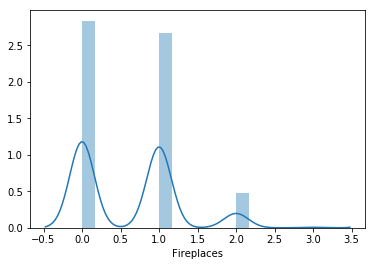

there are 81 NaN in GarageYrBlt


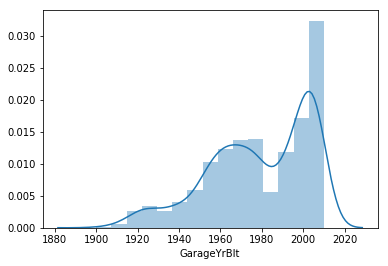

there are 0 NaN in GarageCars


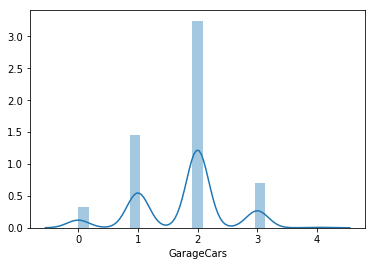

there are 0 NaN in GarageArea


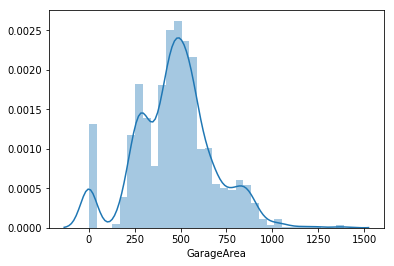

there are 0 NaN in WoodDeckSF


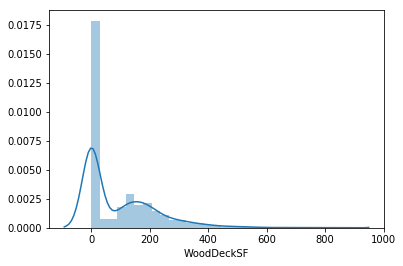

there are 0 NaN in OpenPorchSF


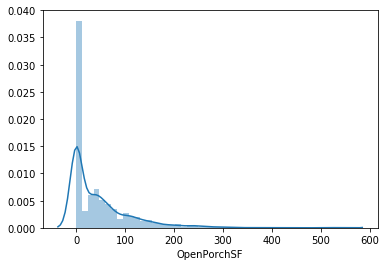

there are 0 NaN in EnclosedPorch


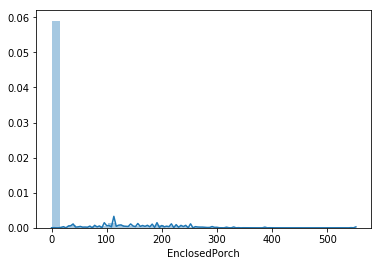

there are 0 NaN in 3SsnPorch


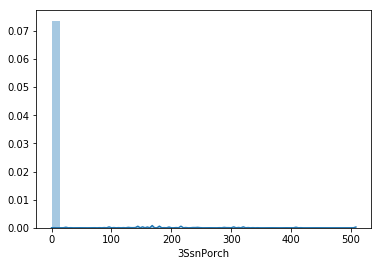

there are 0 NaN in ScreenPorch


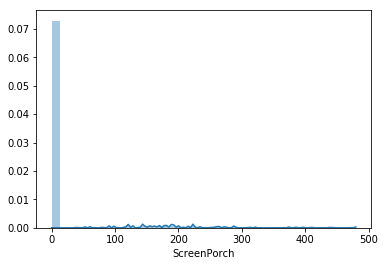

there are 0 NaN in PoolArea


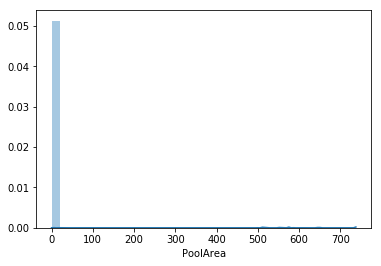

there are 0 NaN in MiscVal


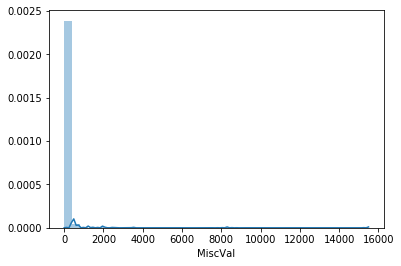

there are 0 NaN in MoSold


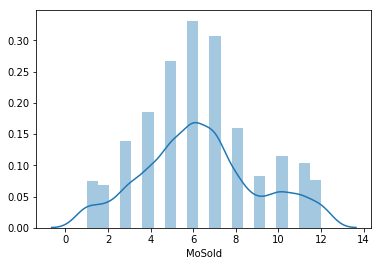

there are 0 NaN in YrSold


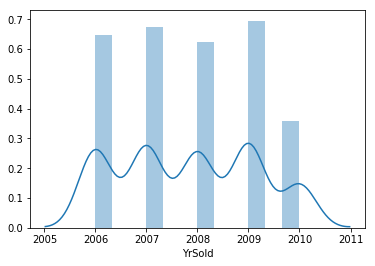

there are 0 NaN in SalePrice


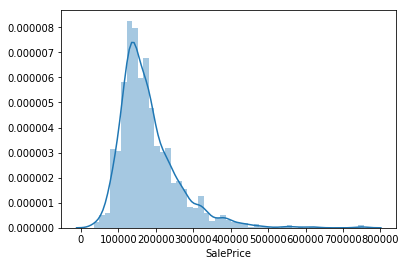

In [15]:
# drop掉每個欄位的NA值並劃出其分布
for i in numeric_data:
    temp = df_train[i].dropna()
    print(f"there are {df_train[i].shape[0] - temp.shape[0]} NaN in {i}")
    sns.distplot(temp) 
    plt.show()

## Drop Null Feature(s)

In [16]:
df_all = pd.concat( [ df_train.drop( [ 'Id', 'SalePrice' ], axis = 1 ),
                      df_test.drop( [ 'Id' ], axis = 1 ) ],
                      axis = 0, ignore_index = False )

In [17]:
# check null status
print( df_all.shape )
df_na = df_all.select_dtypes( exclude = [ 'object' ] ).isnull().sum()
print( df_na[ df_na > 100 ].sort_values(ascending=False) )

(2917, 79)
LotFrontage    486
GarageYrBlt    159
dtype: int64


In [18]:
# drop掉大多為Null的欄位
df_all = df_all.drop(['LotFrontage'], axis = 1) # for 486 null values (train + test)
print( df_all.shape )

(2917, 78)


In [19]:
# drop掉大多為Null的欄位
df_all = df_all.drop(['GarageYrBlt'], axis = 1) # for 159 null values
print(df_all.shape)

(2917, 77)


## Numerical to Categorical

In [20]:
# df_train[['OverallCond', 'SalePrice']].groupby(['OverallCond']).agg({'SalePrice':'median', 'OverallCond':'count'}).sort_values(by='SalePrice', ascending=False)
df_train[['MSSubClass', 'SalePrice']].groupby(['MSSubClass']).agg({'SalePrice':'median', 'MSSubClass':'count'}).sort_values(by='SalePrice', ascending=False)

,SalePrice,MSSubClass
MSSubClass,,
60,216000,297
120,192000,87
80,166500,58
75,163500,16
20,159250,536
70,156000,60
160,146000,63
40,142500,4
85,140750,20


In [21]:
# It helps to transform some numerical features to categorical
df_all.MSSubClass = df_all.MSSubClass.astype( str )
df_all.OverallCond = df_all.OverallCond.astype( str )
df_all.YrSold = df_all.YrSold.astype( str )
df_all.MoSold = df_all.MoSold.astype( str )

In [22]:
# handle skewness
df_train.SalePrice = np.log( df_train.SalePrice )

num_feats = df_all.select_dtypes( exclude = [ 'object' ] ).columns
# na drop should be done series by series
skewed_feats = df_train[ num_feats ].apply( func = lambda s: skew(s.dropna()), axis = 0 )
print(skewed_feats)
skewed_feats = skewed_feats[ skewed_feats > 0.75 ].index
# print(skewed_feats)
df_all[ skewed_feats ] = np.log1p( df_all[ skewed_feats ] )


LotArea          12.560986
OverallQual       0.200579
YearBuilt        -0.611665
YearRemodAdd     -0.501322
MasVnrArea        2.685003
BsmtFinSF1        0.764002
BsmtFinSF2        4.247550
BsmtUnfSF         0.919955
TotalBsmtSF       0.511177
1stFlrSF          0.886723
2ndFlrSF          0.812121
LowQualFinSF      8.995688
GrLivArea         1.009951
BsmtFullBath      0.589751
BsmtHalfBath      4.095895
FullBath          0.031239
HalfBath          0.679351
BedroomAbvGr      0.212107
KitchenAbvGr      4.480268
TotRmsAbvGrd      0.659822
Fireplaces        0.631409
GarageCars       -0.342025
GarageArea        0.131612
WoodDeckSF        1.544214
OpenPorchSF       2.337421
EnclosedPorch     3.083987
3SsnPorch        10.286510
ScreenPorch       4.114690
PoolArea         15.932532
MiscVal          24.434913
dtype: float64


In [23]:
df_all.describe(include = "O")

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,2917,2913,2917,198,2917,2917,2915,2917,2917,2917,...,2758,2758,2917,9,571,105,2917,2917,2916,2917
unique,16,5,2,2,4,4,2,5,3,25,...,5,5,3,3,4,4,12,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,Ex,MnPrv,Shed,6,2007,WD,Normal
freq,1079,2263,2905,120,1859,2622,2914,2132,2776,443,...,2602,2652,2639,4,329,95,503,691,2525,2402


## One-Hot Encoding

In [24]:
df_all_dum = pd.get_dummies(df_all); df_all_dum.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.042040,7,2003,2003,5.283204,6.561031,0.0,5.017280,856.0,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,9.169623,6,1976,1976,0.000000,6.886532,0.0,5.652489,1262.0,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,9.328212,7,2001,2002,5.093750,6.188264,0.0,6.075346,920.0,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,9.164401,7,1915,1970,0.000000,5.379897,0.0,6.293419,756.0,6.869014,...,0,0,0,1,1,0,0,0,0,0
4,9.565284,8,2000,2000,5.860786,6.486161,0.0,6.196444,1145.0,7.044033,...,0,0,0,1,0,0,0,0,1,0


In [25]:
# 將NA的值填平均值
df_all_dum = df_all_dum.fillna( df_all_dum.mean() ); df_all_dum.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.042040,7,2003,2003,5.283204,6.561031,0.0,5.017280,856.0,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,9.169623,6,1976,1976,0.000000,6.886532,0.0,5.652489,1262.0,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,9.328212,7,2001,2002,5.093750,6.188264,0.0,6.075346,920.0,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,9.164401,7,1915,1970,0.000000,5.379897,0.0,6.293419,756.0,6.869014,...,0,0,0,1,1,0,0,0,0,0
4,9.565284,8,2000,2000,5.860786,6.486161,0.0,6.196444,1145.0,7.044033,...,0,0,0,1,0,0,0,0,1,0


## Standardization

In [26]:
# normalization helps a bit
from sklearn import preprocessing
df_all_dum[ num_feats ] = preprocessing.scale( df_all_dum[ num_feats ] )
df_all_dum[ num_feats ].head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-0.101761,0.649580,1.047231,0.897702,1.221486,0.784474,-0.362839,-0.326414,-0.450690,-0.778480,...,-0.924763,0.307226,0.352326,-0.944441,0.834573,-0.427719,-0.112813,-0.30926,-0.064082,-0.189396
1,0.149435,-0.061424,0.155606,-0.394865,-0.801127,0.893720,-0.362839,0.013884,0.495788,0.429642,...,0.626435,0.307226,-0.057840,1.255092,-1.082670,-0.427719,-0.112813,-0.30926,-0.064082,-0.189396
2,0.461682,0.649580,0.981185,0.849829,1.148956,0.659363,-0.362839,0.240419,-0.301492,-0.554112,...,0.626435,0.307226,0.631984,-0.944441,0.664580,-0.427719,-0.112813,-0.30926,-0.064082,-0.189396
3,0.139155,0.649580,-1.858805,-0.682102,-0.801127,0.388054,-0.362839,0.357247,-0.683813,-0.418429,...,0.626435,1.620822,0.790458,-0.944441,0.582039,2.737742,-0.112813,-0.30926,-0.064082,-0.189396
4,0.928451,1.360583,0.948161,0.754083,1.442606,0.759345,-0.362839,0.305295,0.223034,0.126800,...,0.626435,1.620822,1.694687,1.086183,0.981145,-0.427719,-0.112813,-0.30926,-0.064082,-0.189396


## Training Start

In [27]:
# inputs
from sklearn.model_selection import train_test_split
X = df_all_dum[:df_train.shape[0]]
y = df_train.SalePrice

X, X_val, y, y_val = train_test_split(X, y, test_size = 0.1, random_state = 40)

X_test = df_all_dum[ df_train.shape[0]: ]

In [28]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 5))
    return(rmse)

In [29]:
from sklearn.linear_model import LassoCV
model_Lasso = LassoCV( alphas = [ 1, 0.1, 0.01, 0.001, 0.0005, 0.0004, 0.0003, 0.0002 ],
                       max_iter = 2000 ).fit( X, y )
print( rmse_cv( model_Lasso ), model_Lasso.alpha_ )

[0.12306863 0.1037476  0.10976024 0.10668435 0.12303028] 0.0005


In [30]:
coef = pd.Series( model_Lasso.coef_, index = X.columns )
print( sum(coef != 0), sum(coef == 0))

120 203


Text(0.5,1,'Coefficients in Model Lasso')

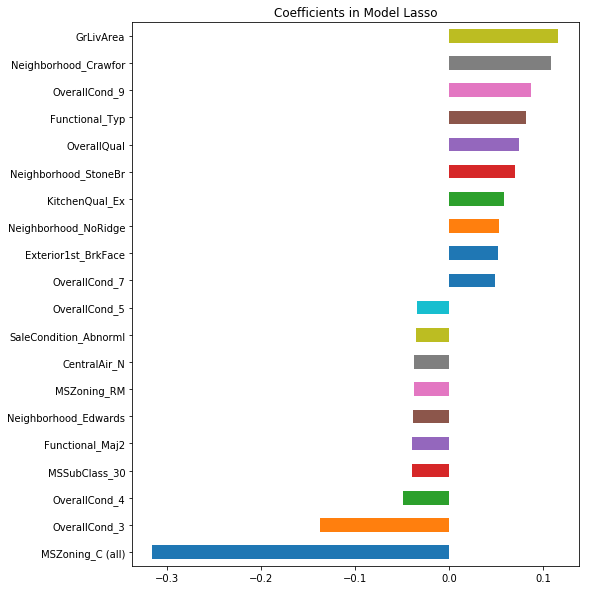

In [31]:
important_coef = pd.concat( [coef.sort_values().head(10), coef.sort_values().tail(10)] )
rcParams['figure.figsize'] = (8.0, 10.0)
important_coef.plot(kind = 'barh')
plt.title('Coefficients in Model Lasso')

In [32]:
from sklearn import metrics
preds = model_Lasso.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, preds)))
print('  R2:', metrics.r2_score( y, preds ) )

RMSE: 0.09837008001663292
  R2: 0.9406221759100507


In [33]:
val_preds = model_Lasso.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.0948234780883113
  R2: 0.9307615882958654


In [34]:
y_answer_Lasso = model_Lasso.predict( X_test )
y_answer_Lasso = np.exp(y_answer_Lasso)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'SalePrice': y_answer_Lasso}, index=df_test.Id).head())


          SalePrice
Id                 
1461  121218.348377
1462  155501.160110
1463  182008.946367
1464  199555.752936
1465  200218.530530


In [35]:
pd.DataFrame({'SalePrice': y_answer_Lasso}, index=df_test.Id).to_csv('submission.csv')

## XGBoost

In [36]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state = None, shuffle = True)
pred_tmp = np.zeros((X_test.shape[0],1)).reshape(-1)
# print(list(kf.split(X)))
for train_index, val_index in kf.split(X):
#     print('train_index:', train_index)
#     print('val_index:', val_index)
    X_train = pd.DataFrame(data = X.values[train_index], columns = X.columns, index = train_index)
    X_val = pd.DataFrame(data = X.values[val_index], columns = X.columns, index = val_index)
#     y_train = pd.DataFrame(data = y.values[train_index], columns = ['SalePrice_N'], index = train_index)
    y_train = y.values[ train_index ]
    y_val = pd.DataFrame(data = y.values[val_index], columns = ['SalePrice'], index = val_index)
    
    model_XGB = XGBRegressor()
    model_XGB.fit(X_train, y_train)
    y_pred = model_XGB.predict(X_val)
    y_ans = model_XGB.predict(X_test)
#     print(y_ans.shape)
    pred_tmp+=np.exp(y_ans)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
    print('  R2:', metrics.r2_score(y_val, y_pred))
y_answer_XGB = pred_tmp/5

RMSE: 0.1256526809103143
  R2: 0.8884033469378239
RMSE: 0.11734850409036572
  R2: 0.9151275508657712
RMSE: 0.13137586597292744
  R2: 0.8887507856730611
RMSE: 0.12395936125718808
  R2: 0.9109313542073791
RMSE: 0.14409975706082492
  R2: 0.885930379904151


In [37]:
model_XGB = XGBRegressor()
model_XGB.fit(X, y)
y_pred = model_XGB.predict( X )
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

RMSE: 0.08775557317473945
  R2: 0.952745013463802


In [38]:
val_preds = model_XGB.predict(X_val)

print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.09520658490423214
  R2: 0.9502059475826947


In [39]:
y_answer_XGB = model_XGB.predict( X_test )
y_answer_XGB = np.exp(y_answer_XGB)
print(pd.DataFrame({'SalePrice': y_answer_XGB}, index=df_test.Id).head())

          SalePrice
Id                 
1461  123175.203125
1462  154070.953125
1463  177168.078125
1464  185527.890625
1465  197290.843750


In [40]:
pd.DataFrame({'SalePrice': y_answer_XGB}, index=df_test.Id).to_csv('submission.csv')

## SVR

In [41]:
# KFold Data Split
from sklearn.svm import SVR
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state = None, shuffle = False)
pred_tmp = np.zeros((X_test.shape[0],1)).reshape(-1)
for train_index, val_index in kf.split(X):
    X_train = pd.DataFrame(data = X.values[train_index], columns = X.columns, index = train_index)
    X_val = pd.DataFrame(data = X.values[val_index], columns = X.columns, index = val_index)
#     y_train = pd.DataFrame(data = y.values[train_index], columns = ['SalePrice'], index = train_index)
    y_train = y.values[ train_index ]
    y_val = pd.DataFrame(data = y.values[val_index], columns = ['SalePrice'], index = val_index)
    model_SVR = SVR(kernel='rbf', gamma=0.002)
    model_SVR.fit(X_train, y_train)
    y_pred = model_SVR.predict(X_val)
    y_ans = model_SVR.predict(X_test)
    pred_tmp+=np.exp(y_ans)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
    print('  R2:', metrics.r2_score(y_val, y_pred))
y_answer_SVR = pred_tmp/5

RMSE: 0.13186990984654537
  R2: 0.8919331953632149
RMSE: 0.11592677358114235
  R2: 0.9155180874667164
RMSE: 0.123038058975897
  R2: 0.8982132550670144
RMSE: 0.11614002850796985
  R2: 0.923292341875523
RMSE: 0.1240821444522835
  R2: 0.90880095409149


In [42]:
y_pred = model_SVR.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

RMSE: 0.10964104194992029
  R2: 0.9262359866665073


In [43]:
val_preds = model_SVR.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.1240821444522835
  R2: 0.90880095409149


In [44]:
model_SVR = SVR(kernel='rbf', gamma=0.002)
model_SVR.fit(X, y)
y_answer_SVR = model_SVR.predict( X_test )
y_answer_SVR = np.exp(y_answer_SVR)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'SalePrice': y_answer_SVR}, index=df_test.Id).head())

          SalePrice
Id                 
1461  120724.246119
1462  160166.410524
1463  181095.836170
1464  199107.728208
1465  192414.099139


In [45]:
pd.DataFrame({'SalePrice': y_answer_SVR}, index=df_test.Id).to_csv('submission.csv')

## Blending

In [46]:
# Lasso + SVR
y_answer = y_answer_Lasso * 0.75 + y_answer_SVR * 0.25
print(pd.DataFrame({'SalePrice': y_answer}, index=df_test.Id).head())
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=df_test.Id).to_csv('submission.csv')

          SalePrice
Id                 
1461  121094.822813
1462  156667.472714
1463  181780.668818
1464  199443.746754
1465  198267.422682
RMSE: 0.1240821444522835
  R2: 0.90880095409149


In [47]:
# Lasso + XGB
y_answer = y_answer_Lasso * 0.90 + y_answer_XGB * 0.10
print(pd.DataFrame({'SalePrice': y_answer}, index=df_test.Id).head())

pd.DataFrame({'SalePrice': y_answer}, index=df_test.Id).to_csv('submission.csv')

          SalePrice
Id                 
1461  121414.034047
1462  155358.139802
1463  181524.860324
1464  198152.966705
1465  199925.761461


In [48]:
# Lasso + SVR + XGB
y_answer = y_answer_Lasso * 0.72 + y_answer_SVR * 0.24 + y_answer_XGB * 0.04
print(pd.DataFrame({'SalePrice': y_answer}, index=df_test.Id).head())
pd.DataFrame({'SalePrice': y_answer}, index=df_test.Id).to_csv('submission.csv')

          SalePrice
Id                 
1461  121178.037713
1462  156563.611696
1463  181596.165210
1464  198887.112118
1465  198228.359564


In [49]:
# Lasso + SVR + XGB -2
y_answer = (y_answer_Lasso + y_answer_SVR + y_answer_XGB) /3
print(pd.DataFrame({'SalePrice': y_answer}, index=df_test.Id).head())
pd.DataFrame({'SalePrice': y_answer}, index=df_test.Id).to_csv('submission.csv')

          SalePrice
Id                 
1461  121705.932540
1462  156579.507920
1463  180090.953554
1464  194730.457256
1465  196641.157806


In [50]:
# SVR + XGB
y_answer = y_answer_SVR * 0.3 + y_answer_XGB * 0.7
print(pd.DataFrame({'SalePrice': y_answer}, index=df_test.Id).head())

pd.DataFrame({'SalePrice': y_answer}, index=df_test.Id).to_csv('submission.csv')

          SalePrice
Id                 
1461  122439.914461
1462  155899.587220
1463  178346.407101
1464  189601.841900
1465  195827.823492
